In [1]:
!pip install gensim


In [2]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [3]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.7236376404762268), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545307636260986), ('cats', 0.6471933126449585), ('rabbit', 0.6468630433082581)]
0.87980753


Part 1a

In [4]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

In [5]:
word = 'education'

vector = model[word]

print("Most similar to 'education':")
print(model.most_similar(word))


print("\nSimilarity between 'education' and 'school':")
print(model.similarity('education', 'school'))

Most similar to 'education':
[('educational', 0.8206785321235657), ('schools', 0.7696099877357483), ('teaching', 0.7583372592926025), ('curriculum', 0.7522472739219666), ('programs', 0.7507966756820679), ('social', 0.7497825622558594), ('health', 0.7440307140350342), ('school', 0.7337225079536438), ('academic', 0.7242811322212219), ('welfare', 0.7237160205841064)]

Similarity between 'education' and 'school':
0.7337225


Yes, the results make sense. Most of the similar words like schools, teaching, curriculum, and academic are directly related to education. Others like social and welfare also fit since education often connects to those areas. The similarity with school is pretty high too, which checks out.

In [6]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827143311500549), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174600601196), ('berlin', 0.6665561199188232), ('brussels', 0.6574430465698242), ('lyon', 0.6526200771331787), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526145935059)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475123882293701), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.4440663158893585), ('dingos', 0.44403281807899475)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392118573188782), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964332580566), ('pigs', 0.6755765080451965), ('animal', 0.6683686971664429)]


In [7]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039813995361), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693746566772), ('uterus', 0.5093088746070862), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.42151397466659546), ('nistelrooy', 0.41140034794807434), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.40107354521751404), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661209940910339),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967085838318),
 ('patient', 0.6772218346595764),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586815714836121),
 ('medical', 0.6466937065124512)]

Part 1b

In [8]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document

In [9]:
gender = model["woman"] - model["man"]

In [10]:
print("doctor + gender:")
print(model.most_similar(model["doctor"] + gender))

print("\nteacher + gender:")
print(model.most_similar(model["teacher"] + gender))

print("\nleader + gender:")
print(model.most_similar(model["leader"] + gender))


doctor + gender:
[('doctor', 0.8661209940910339), ('nurse', 0.7757077813148499), ('physician', 0.7128061652183533), ('woman', 0.7089030742645264), ('doctors', 0.6793617010116577), ('pregnant', 0.6787967085838318), ('patient', 0.6772218346595764), ('dentist', 0.6694242358207703), ('mother', 0.6586815714836121), ('medical', 0.6466937065124512)]

teacher + gender:
[('teacher', 0.8804540038108826), ('student', 0.7196699380874634), ('schoolteacher', 0.6752521991729736), ('nurse', 0.6723167896270752), ('graduate', 0.65756756067276), ('woman', 0.6537831425666809), ('mother', 0.6472994685173035), ('school', 0.6464942693710327), ('kindergarten', 0.644048810005188), ('teachers', 0.6435563564300537)]

leader + gender:
[('leader', 0.8682992458343506), ('opposition', 0.7051516175270081), ('party', 0.7049993276596069), ('lawmaker', 0.6638129353523254), ('candidate', 0.6585460305213928), ('democratic', 0.632266640663147), ('president', 0.622901201248169), ('activist', 0.618613064289093), ('politician

When I added the gender vector to words like doctor and teacher, the results included terms like nurse, mother, and pregnant, showing gender stereotypes in the model. For leader, the results stayed political, which might show that leadership is still viewed more as a male-associated concept. So yes, it does show bias in how roles are represented.

Part 2: Visualization and Embeddings in Space

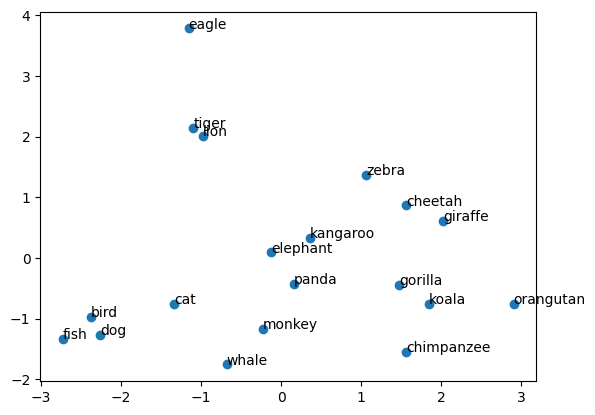

In [11]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

In [12]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.

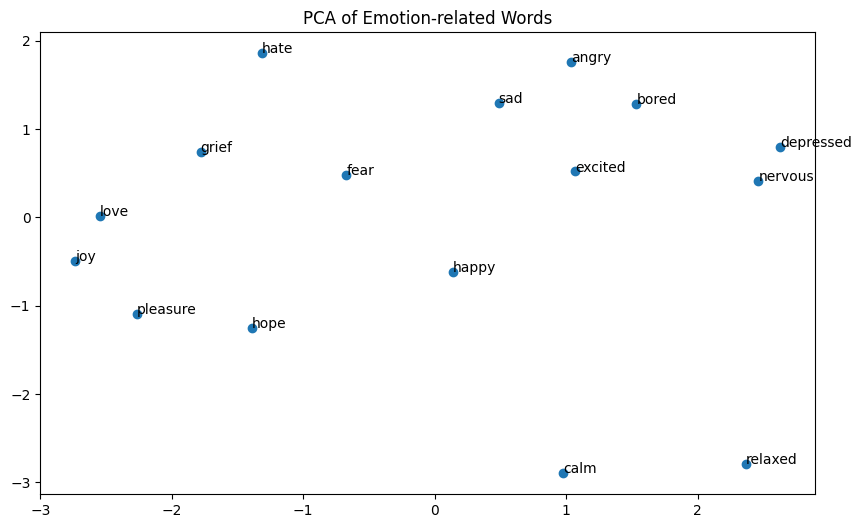

In [13]:
words = ["happy", "sad", "angry", "joy", "fear", "love", "hate", "excited", "calm", "nervous", "depressed", "hope", "grief", "pleasure", "relaxed", "bored"]

X = [model[word] for word in words]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i, 0], X_pca[i, 1]))
plt.title("PCA of Emotion-related Words")
plt.show()


The distances between words in the plot mostly make sense. Similar emotions like joy, love, and pleasure are grouped closely, while negative ones like sad, depressed, and nervous form their own cluster. Opposites like calm and angry are far apart, showing how the model captures emotional differences based on language use.

In [14]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")

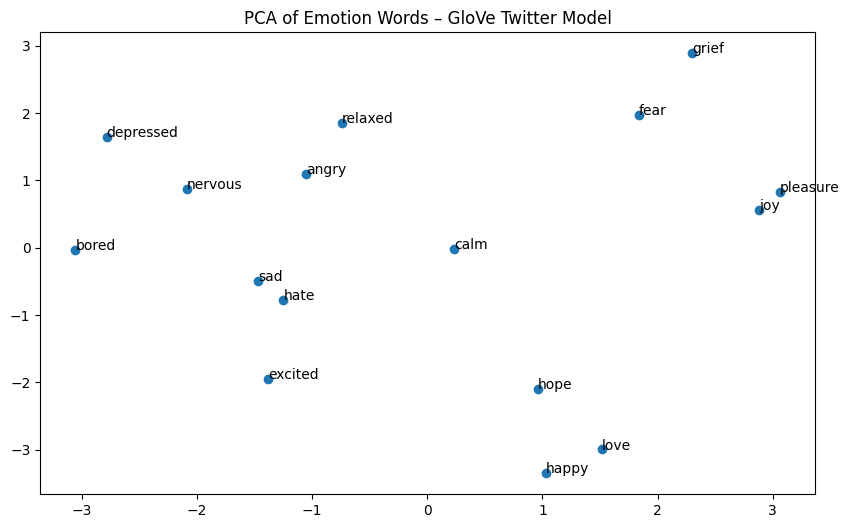

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the model (you already did this)
# twitter_model = gensim.downloader.load("glove-twitter-100")

# Same set of words
words = ["happy", "sad", "angry", "joy", "fear", "love", "hate", "excited", "calm", "nervous", "depressed", "hope", "grief", "pleasure", "relaxed", "bored"]

# Filter words that are in the model's vocabulary
words_in_vocab = [word for word in words if word in twitter_model]

# Get the vectors
X = [twitter_model[word] for word in words_in_vocab]

# PCA to reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for i, word in enumerate(words_in_vocab):
    plt.annotate(word, (X_pca[i, 0], X_pca[i, 1]))
plt.title("PCA of Emotion Words – GloVe Twitter Model")
plt.show()


The way the words are grouped changed a bit in the Twitter model. Some emotions like grief and excited are more spread out, and the clusters aren't as tight. That probably has to do with how people talk on Twitter, it’s more casual and emotional, so the model picks up on different patterns.










Part 3: Embedding reddit posts

In [16]:
#read in uiuc csv
import pandas as pd
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])




In [17]:
#using the code from project 1, clean the text and create a bag of words representation of the text

In [18]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import CountVectorizer

nlp = spacy.load("en_core_web_sm")

def clean(text):
    text = ' '.join(text.split())                    
    text = text.lower()                          
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])  
    return text

data['cleaned_text'] = data['text'].astype(str).apply(clean)

def lemmatize(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return " ".join(tokens)

data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1, 2))
bag_of_words = vectorizer.fit_transform(data['lemmatized_text'])


In [19]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 

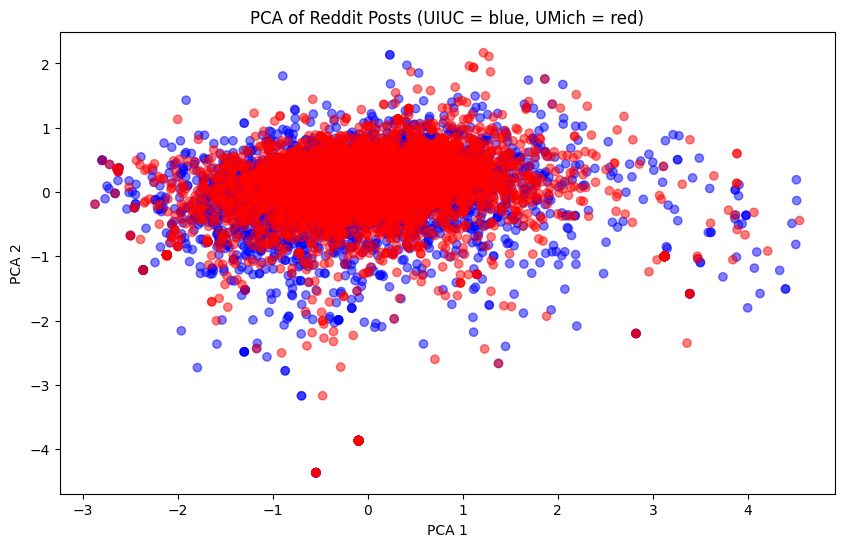

In [20]:
import numpy as np
model = gensim.downloader.load("glove-twitter-100")

def get_post_vector(text):
    words = text.split()
    vectors = [model[word] for word in words if word in model]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)  # fallback if no known words
    return np.mean(vectors, axis=0)

data['embedding'] = data['lemmatized_text'].apply(get_post_vector)

embedding_matrix = np.vstack(data['embedding'].values)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(embedding_matrix)

plt.figure(figsize=(10, 6))
colors = ['red' if label == 0 else 'blue' for label in data['label']]
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.5)
plt.title("PCA of Reddit Posts (UIUC = blue, UMich = red)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


There’s a lot of overlap between the two subreddits in the PCA plot, so it’s hard to draw a clear line between them. This suggests that people from both schools talk about similar things or use similar language. There might be some small differences, but nothing super obvious just from the embeddings alone.

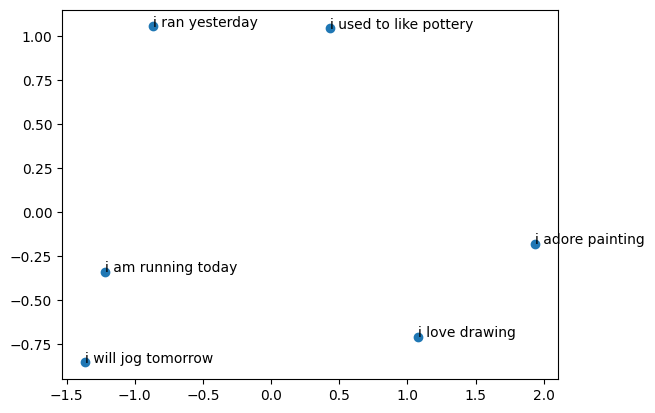

In [21]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#remove nan values
avg_embeddings=[embedding for embedding in avg_embeddings if not np.isnan(embedding).any()]
#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

In [22]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation? 

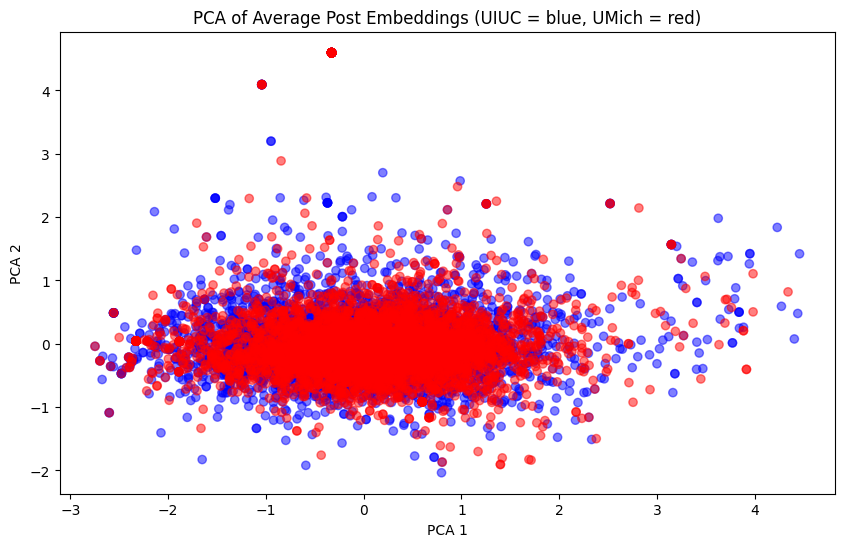

In [23]:
def avg_embedding(sentence, model):
    words = sentence.split()
    embeddings = [model[word] for word in words if word in model]
    if len(embeddings) == 0:
        return np.zeros(model.vector_size)
    return np.mean(embeddings, axis=0)

data['post_embedding'] = data['lemmatized_text'].apply(lambda x: avg_embedding(x, model))

data = data[~data['post_embedding'].apply(lambda x: np.isnan(x).any() or np.all(x == 0))]

embedding_matrix = np.vstack(data['post_embedding'].values)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(embedding_matrix)

colors = ['blue' if label == 1 else 'red' for label in data['label']]

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.5)
plt.title("PCA of Average Post Embeddings (UIUC = blue, UMich = red)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


This plot is a bit different from the last one because it uses average word embeddings instead of bag-of-words. That means it's capturing more of the meaning behind the words, not just which ones appear most often. Even with that, there still isn’t a clear separation between the two subreddits — UIUC and UMich posts mostly overlap, which makes sense since people probably talk about similar college-related stuff in both.

Part 4: HuggingFace and BERT

In [24]:
!pip install transformers

In [25]:
import torch
print(torch.__version__)
print(torch.backends.mps.is_available())  # this checks Apple Silicon GPU


2.6.0
False


In [26]:
from transformers import pipeline

pipe = pipeline("text-classification",
                model="finiteautomata/bertweet-base-sentiment-analysis",
                framework="pt")

pipe("I love UIUC")


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cpu


[{'label': 'POS', 'score': 0.99246746301651}]

In [27]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cpu


In [28]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [29]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label

In [33]:
def classify_with_truncation(text):
    try:
        return pipe(text[:500])[0]['label']  # trims long posts
    except:
        return "UNKNOWN"

data['sentiment'] = data['text'].astype(str).apply(classify_with_truncation)

most_common_sentiment = data['sentiment'].value_counts().idxmax()
print(f"The most common sentiment is: {most_common_sentiment}")



The most common sentiment is: NEU


In [34]:
#look at ten sample posts and labels; do you agree with all of them? 
sampled = data[['text', 'sentiment']].sample(10, random_state=42)

for i, row in sampled.iterrows():
    print(f"\nPost {i+1}:\n{row['text']}\n→ Sentiment: {row['sentiment']}")



Post 1002:
yea which is why the CS pre-admit thing didn’t make a ton of sense to me. Course enrollment in most upper-levels wouldn’t drop by any significant margin. If they start restricting data science enrollment in those then that program will lose its edge. As of now it’s quite well balanced between stats and computing compared to many DS programs elsewhere
→ Sentiment: NEG

Post 1223:
Rent
→ Sentiment: NEU

Post 1013:
The county clerk's office is supposed to mail you a registration card once it's processed. (You don't need the card to vote). If you're still not on the list in a couple weeks, I'd probably contact the clerk's office to ask if it's okay to resubmit an application when the first one may still be pending. For most things I'd just do it, but some Michigan prosecutors are eager to nail people for voter fraud, and submitting two applications *might* be the sort of harmless mistake that constitutes a federal felony.

Worst case you can always register *and* vote on electi

Some of the labels make sense, like “Rent” being neutral. But a few seem off, like the first post, which feels more like an opinion or discussion, not negative. Overall, the model does okay, but it struggles a bit with longer or more complex posts.

In [31]:
#is the UIUC or Michigan subreddit more negative?

In [35]:
neg_counts = data[data['sentiment'] == 'NEG']['label'].value_counts()

uiuc_neg = neg_counts.get(1, 0)
mich_neg = neg_counts.get(0, 0)

print(f"UIUC negative posts: {uiuc_neg}")
print(f"Michigan negative posts: {mich_neg}")


UIUC negative posts: 1138
Michigan negative posts: 1259


Michigan has more negative posts.

# Citations

OpenAI. (2025). Chat with ChatGPT on sentiment analysis using BERTweet and PCA visualization. ChatGPT. https://chat.openai.com/